In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

#Summary Analysis (USD)

remove "payout" at the end for better graphs

In [2]:
df_fin = pd.read_csv("D:\Python\WebApp\MLC_Finances_Eng_Final_UTF8.csv")

In [3]:
print(df_fin.size)

14982


In [4]:
df_fin.describe()

,Sum,Arkhipov,Arkhipov USD,Ventsel
count,1362.000000,1119.000000,64.000000,322.000000
mean,0.000000,0.000000,0.000000,0.000000
std,4709.803635,4751.131381,112.048176,3927.837722
min,-28800.000000,-28800.000000,-523.000000,-15000.000000
25%,-2000.000000,-2082.000000,-2.000000,-1300.000000
50%,200.000000,200.000000,-2.000000,0.000000
75%,2300.000000,2500.000000,40.000000,1287.500000
max,30300.000000,30300.000000,250.000000,19250.000000


In [5]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Operation       1362 non-null   object 
 1   Classification  1362 non-null   object 
 2   Sum             1362 non-null   int64  
 3   Category        1362 non-null   object 
 4   Date            1362 non-null   object 
 5   Owner           1362 non-null   object 
 6   Commentary Eng  1269 non-null   object 
 7   Commentary      1268 non-null   object 
 8   Arkhipov        1119 non-null   float64
 9   Arkhipov USD    64 non-null     float64
 10  Ventsel         322 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 117.2+ KB


In [6]:
df_fin['Date'] = pd.to_datetime(df_fin['Date'], format='%d/%m/%Y', errors='coerce')

In [7]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Operation       1362 non-null   object        
 1   Classification  1362 non-null   object        
 2   Sum             1362 non-null   int64         
 3   Category        1362 non-null   object        
 4   Date            1359 non-null   datetime64[ns]
 5   Owner           1362 non-null   object        
 6   Commentary Eng  1269 non-null   object        
 7   Commentary      1268 non-null   object        
 8   Arkhipov        1119 non-null   float64       
 9   Arkhipov USD    64 non-null     float64       
 10  Ventsel         322 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 117.2+ KB


In [8]:
df_fin.head()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
0,Head Purchase,Debit,-10000,Equipment,2015-08-01,Arkhipov,Denis for Heads,Дену за Headы,-10000.0,NaN,0.0
1,Membership Fee,Credit,29000,Membership Fee,2015-08-01,Arkhipov,Balance Remainder Arkhipov,Остаток у Arkhipovа,29000.0,NaN,0.0
2,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
3,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
4,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0


In [9]:
df_fin.tail()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
1357,Payout,Debit,-28800,Payout,2022-05-03,Arkhipov,Eugene (Liquidation),Eugene (Liquidation),-28800.0,NaN,NaN
1358,Payout,Debit,-9385,Payout,2022-05-03,Ventsel,Artur (Liquidation),Artur (Liquidation),NaN,NaN,-9385.0
1359,Payout,Debit,-15150,Payout,2022-05-07,Arkhipov,Artur (Liquidation),Artur (Liquidation),-15150.0,NaN,NaN
1360,Payout,Debit,-15150,Payout,2022-05-07,Arkhipov,Eugene (Liquidation),Eugene (Liquidation),-15150.0,NaN,NaN
1361,Field Fees,Credit,30300,Field,2022-05-07,Arkhipov,Shuxminov debt payment in full,Shuxminov,30300.0,NaN,NaN


##Financial Exploratory analysis General

###Split main database into USD transactions only

In [10]:
df_fin_usd = df_fin[df_fin['Classification'].str.contains('USD')]

In [11]:
df_fin_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 592 to 1355
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Operation       64 non-null     object        
 1   Classification  64 non-null     object        
 2   Sum             64 non-null     int64         
 3   Category        64 non-null     object        
 4   Date            64 non-null     datetime64[ns]
 5   Owner           64 non-null     object        
 6   Commentary Eng  64 non-null     object        
 7   Commentary      64 non-null     object        
 8   Arkhipov        0 non-null      float64       
 9   Arkhipov USD    64 non-null     float64       
 10  Ventsel         0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 6.0+ KB


In [12]:
df_fin_usd.head()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
592,Savings,Credit USD,250,Equipment,2018-06-26,Arkhipov USD,money set aside for FIL fee/equipment purchase,деньги отложенны за FIL Fee/equipment purchase,NaN,250.0,NaN
660,Elbows Purchase,Debit USD,-250,Equipment,2019-06-14,Arkhipov USD,elbow pads (270 usd total),elbow pads (270 USD total),NaN,-250.0,NaN
1059,Gloves Sale,Credit USD,40,Equipment,2021-05-06,Arkhipov USD,"Oleg, brine king gloves","Oleg, brine king gloves",NaN,40.0,NaN
1060,Shafts Sale,Credit USD,50,Equipment,2021-05-06,Arkhipov USD,"Oleg, brine triumph shaft","Oleg, brine triumph shaft",NaN,50.0,NaN
1061,Strings Sale,Credit USD,20,Equipment,2021-05-06,Arkhipov USD,"20 usd money mesh, Misha p","20 usd money mesh, Misha p",NaN,20.0,NaN


In [13]:
df_fin_usd.tail()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
1319,Head Sale,Credit USD,30,Equipment,2022-02-10,Arkhipov USD,Evo 2 artur,Evo 2 artur,NaN,30.0,NaN
1334,Head Sale,Credit USD,40,Equipment,2022-03-18,Arkhipov USD,evo 2 vova,evo 2 vova,NaN,40.0,NaN
1340,Shafts Sale,Credit USD,40,Equipment,2022-03-22,Arkhipov USD,brine shafts,brine shafts,NaN,40.0,NaN
1354,Payout,Debit USD,-523,Payout,2022-05-03,Arkhipov USD,Artur (Liquidation),Artur (Liquidation),NaN,-523.0,NaN
1355,Payout,Debit USD,-523,Payout,2022-05-03,Arkhipov USD,Eugene (Liquidation),Eugene (Liquidation),NaN,-523.0,NaN


In [14]:
category_sums_usd = df_fin_usd.groupby('Category')['Sum'].sum()
print(category_sums_usd)

Category
Equipment    1046
Payout      -1046
Name: Sum, dtype: int64


In [15]:
category_transaction_counts_usd = df_fin_usd['Category'].value_counts()
print(category_transaction_counts_usd)

Equipment    62
Payout        2
Name: Category, dtype: int64


In [16]:
# Group the DataFrame by 'Category' and 'Date' and calculate the sum of 'Sum' and the count of transactions
category_sum_over_time = df_fin_usd.groupby(['Category', 'Date'])['Sum'].sum().reset_index()
category_count_over_time = df_fin_usd.groupby(['Category', 'Date']).size().reset_index(name='Count')

# Create a line graph for the sum of transactions over time for each category
fig_sum_over_time = px.line(category_sum_over_time, x='Date', y='Sum', color='Category',
                            title='Sum of Transactions Over Time (usd)')

# Create a line graph for the number of transactions over time for each category
fig_count_over_time = px.line(category_count_over_time, x='Date', y='Count', color='Category',
                              title='Number of Transactions Over Time (usd)')

# Show the interactive graphs
fig_sum_over_time.show()
fig_count_over_time.show()

###"Category" analysis:

In [17]:
category_classification_counts_usd = df_fin_usd.groupby(['Category', 'Classification'])['Operation'].count()
print(category_classification_counts_usd)

Category   Classification
Equipment  Credit USD        30
           Debit USD         32
Payout     Debit USD          2
Name: Operation, dtype: int64


####Category Totals

In [18]:
category_summary_usd = df_fin_usd.groupby('Category').agg({'Sum': ['sum', 'count']})
category_summary_usd.columns = ['Total Sum', 'Number of Transactions']
category_summary_usd = category_summary_usd.reset_index()

category_summary_usd['Profit/Loss per Transaction'] = category_summary_usd['Total Sum'] / category_summary_usd['Number of Transactions']

print(category_summary_usd)

    Category  Total Sum  Number of Transactions  Profit/Loss per Transaction
0  Equipment       1046                      62                    16.870968
1     Payout      -1046                       2                  -523.000000


###Top 10 Categories

In [19]:
# Sort the DataFrame by 'Total Sum' in descending order and select the top 10 rows
top_10_total_sum_usd = category_summary_usd.sort_values(by='Total Sum', ascending=False).head(10)

# Create a horizontal bar graph for 'Total Sum'
fig_total_sum_usd = px.bar(top_10_total_sum_usd, x='Category', y='Total Sum',
                      title='Top 10 Categories by Total Sum (usd)')

# Create a horizontal bar graph for 'Number of Transactions'
top_10_transactions_usd = category_summary_usd.sort_values(by='Number of Transactions', ascending=False).head(10)
fig_transactions_usd = px.bar(top_10_transactions_usd, x='Category', y='Number of Transactions',
                          title='Top 10 Categories by Number of Transactions')

# Create a horizontal bar graph for 'Profit/Loss per Transaction'
top_10_profit_loss_usd = category_summary_usd.sort_values(by='Profit/Loss per Transaction', ascending=False).head(10)
fig_profit_loss_usd = px.bar(top_10_profit_loss_usd, x='Category', y='Profit/Loss per Transaction',
                        title='Top 10 Categories by Profit/Loss per Transaction (usd)')

# Show the interactive graphs
fig_total_sum_usd.show()
fig_transactions_usd.show()
fig_profit_loss_usd.show()

###"Operation" summary

In [20]:
operation_summary_usd = df_fin_usd.groupby('Operation').agg({'Sum': ['sum', 'count']})
operation_summary_usd.columns = ['Total Sum', 'Number of Transactions']
operation_summary_usd = operation_summary_usd.reset_index()

# Calculate the Total Sum per Transaction
operation_summary_usd['Profit/Loss per Transaction'] = operation_summary_usd['Total Sum'] / operation_summary_usd['Number of Transactions']

print(operation_summary_usd)

           Operation  Total Sum  Number of Transactions  \
0     Ball Purchases       -181                       1   
1    Elbows Purchase       -250                       1   
2        Elbows Sale         80                       2   
3     Equipment Sale          5                       1   
4        Gloves Sale        195                       6   
5          Head Sale        310                       7   
6        Helmet Sale        240                       5   
7             Payout      -1046                       2   
8      Reimbursement        181                       1   
9            Savings        250                       1   
10       Shafts Sale        259                       5   
11  Strings Purchase        -68                      30   
12      Strings Sale         25                       2   

    Profit/Loss per Transaction  
0                   -181.000000  
1                   -250.000000  
2                     40.000000  
3                      5.000000  
4  

###"Operation" analysis

####Sum totals for operation variables 

In [21]:
# Create variables for each pair/group of usd operations
ball_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Ball Purchase', 'Ball Sale', 'Ball Purchases']), 'Sum'].sum()
elbows_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Elbows Purchase', 'Elbows Sale']), 'Sum'].sum()
equipment_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Equipment Purchase', 'Equipment Sale']), 'Sum'].sum()
field_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Field Fees', 'Field Rental']), 'Sum'].sum()
gloves_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Gloves Purchase', 'Gloves Sale']), 'Sum'].sum()
head_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Head Purchase', 'Head Sale']), 'Sum'].sum()
helmet_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Helmet Purchase', 'Helmet Sale']), 'Sum'].sum()
loan_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Loan Issuance', 'Loan Repayment', 'Loan']), 'Sum'].sum()
membership_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Membership Fee', 'Membership Fee EFL', 'Membership Fee FIL']), 'Sum'].sum()
shafts_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Shafts Purchase', 'Shafts Sale']), 'Sum'].sum()
stick_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Stick Sale', 'Sticks Purchase']), 'Sum'].sum()
strings_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Strings Purchase', 'Strings Sale']), 'Sum'].sum()
t_shirt_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['T-Shirt Sale', 'T-Shirts Purchase']), 'Sum'].sum()

In [22]:
# Create variables for usd operations without partners
bank_interest_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Credit', 'Sum'].sum()
materials_purchase_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Materials Purchase', 'Sum'].sum()
lacrosse_clinic_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Lacrosse Clinic', 'Sum'].sum()

In [23]:
# Add addditonal totals for usd
order_refund_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Order Refund', 'Sum'].sum()
payment_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Payment', 'Sum'].sum()
payout_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Payout', 'Sum'].sum()
player_fine_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Player Fine', 'Sum'].sum()
reimbursement_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Reimbursement', 'Sum'].sum()
shoulders_sale_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Shoulders Sale', 'Sum'].sum()
transfer_to_artur_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Transfer to Artur', 'Sum'].sum()

In [24]:
ball_total_usd
elbows_total_usd
equipment_total_usd
field_total_usd
gloves_total_usd
head_total_usd
helmet_total_usd
loan_total_usd
shafts_total_usd
stick_total_usd
strings_total_usd
t_shirt_total_usd
membership_total_usd
order_refund_total_usd
payment_total_usd
payout_total_usd
player_fine_total_usd
reimbursement_total_usd
shoulders_sale_total_usd
transfer_to_artur_total_usd
bank_interest_usd
materials_purchase_usd
lacrosse_clinic_usd

0

In [25]:
# Display the total sums for each usd operation
print("Ball Total USD:", ball_total_usd)
print("Elbows Total USD:", elbows_total_usd)
print("Equipment Total USD:", equipment_total_usd)
print("Field Total USD:", field_total_usd)
print("Gloves Total USD:", gloves_total_usd)
print("Head Total USD:", head_total_usd)
print("Helmet Total USD:", helmet_total_usd)
print("Loan Total USD:", loan_total_usd)
print("Shafts Total USD:", shafts_total_usd)
print("Stick Total USD:", stick_total_usd)
print("Strings Total USD:", strings_total_usd)
print("T-Shirt Total USD:", t_shirt_total_usd)
print("Membership Fee Total USD:", membership_total_usd)
print("Order Refund Total USD:", order_refund_total_usd)
print("Payment Total USD:", payment_total_usd)
print("Payout Total USD:", payout_total_usd)
print("Player Fine Total USD:", player_fine_total_usd)
print("Reimbursement Total USD:", reimbursement_total_usd)
print("Shoulders Sale Total USD:", shoulders_sale_total_usd)
print("Transfer to Artur Total USD:", transfer_to_artur_total_usd)
print("Bank Interest USD:", bank_interest_usd)
print("Materials Purchase USD:", materials_purchase_usd)
print("Lacrosse Clinic USD:", lacrosse_clinic_usd)


Ball Total USD: -181
Elbows Total USD: -170
Equipment Total USD: 5
Field Total USD: 0
Gloves Total USD: 195
Head Total USD: 310
Helmet Total USD: 240
Loan Total USD: 0
Shafts Total USD: 259
Stick Total USD: 0
Strings Total USD: -43
T-Shirt Total USD: 0
Membership Fee Total USD: 0
Order Refund Total USD: 0
Payment Total USD: 0
Payout Total USD: -1046
Player Fine Total USD: 0
Reimbursement Total USD: 181
Shoulders Sale Total USD: 0
Transfer to Artur Total USD: 0
Bank Interest USD: 0
Materials Purchase USD: 0
Lacrosse Clinic USD: 0


###"Operation" Graphs

####Top 25 Profit Operations USD

In [26]:
# Calculate the total sums for each operation
total_sums = [
    ("Ball", ball_total_usd),
    ("Elbows", elbows_total_usd),
    ("Equipment", equipment_total_usd),
    ("Field", field_total_usd),
    ("Gloves", gloves_total_usd),
    ("Head", head_total_usd),
    ("Helmet", helmet_total_usd),
    ("Loan", loan_total_usd),
    ("Membership", membership_total_usd),
    ("Shafts", shafts_total_usd),
    ("Stick", stick_total_usd),
    ("Strings", strings_total_usd),
    ("T-Shirt", t_shirt_total_usd),
]

# Create a DataFrame
df_total_sums_usd = pd.DataFrame(total_sums, columns=["Operation", "Total Sum"])

# Sort the DataFrame by Total Sum in descending order
df_total_sums_usd  = df_total_sums_usd .sort_values(by="Total Sum", ascending=False)

# Select the top 25 rows
top_25_total_sums = df_total_sums_usd .head(25)

# Create a bar graph
fig = px.bar(
    top_25_total_sums,
    x="Operation",
    y="Total Sum",
    labels={"Total Sum": "Total Sum (usd)"},
    title="Top 25 Profit for usd Operations",
)

# Show the graph
fig.show()


####Top 10 "Operations" by Sum

In [27]:
# Group the data by 'Operation' and sum the 'Sum' values for each group
operation_summary_usd = df_fin_usd.groupby('Operation')['Sum'].sum().reset_index()

# Sort the data in descending order by the 'Sum' column and get the top 10 rows
top_10_operations = operation_summary_usd.sort_values(by='Sum', ascending=False).head(10)

# Create a bar graph using Plotly Express
fig = px.bar(top_10_operations, x='Operation', y='Sum', title='Top 10 Operations by Total Sum (usd)')

# Show the graph
fig.show()

####Total Sales over time (usd)

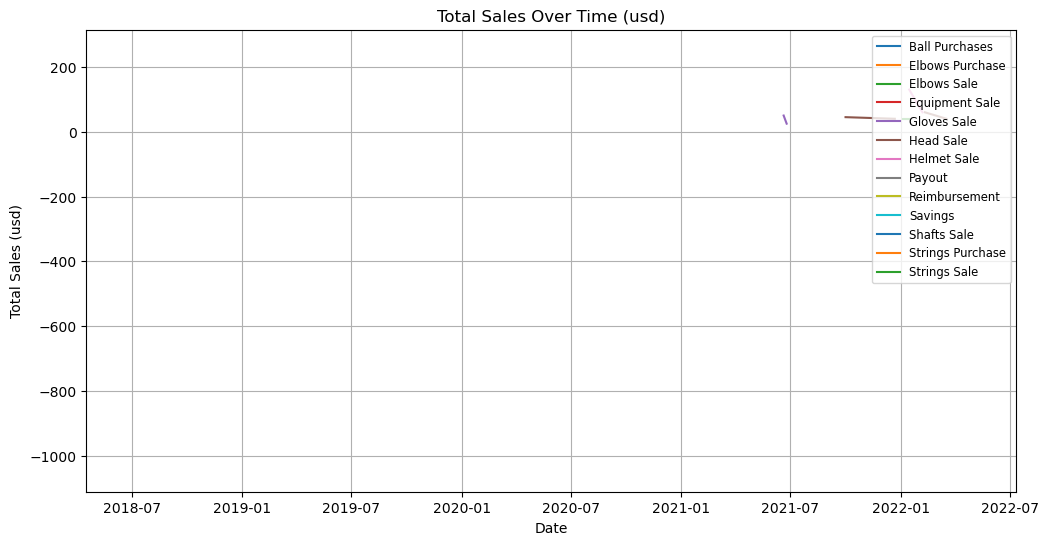

In [28]:
# Group the usd data by Date and the revenue variable and sum the "Sum" column
revenue_data_usd = df_fin_usd.groupby(['Date', 'Operation'])['Sum'].sum().unstack()

# Plot the data for each revenue variable
plt.figure(figsize=(12, 6))
for operation in revenue_data_usd.columns:
    plt.plot(revenue_data_usd.index, revenue_data_usd[operation], label=operation)

plt.xlabel('Date')
plt.ylabel('Total Sales (usd)')
plt.title('Total Sales Over Time (usd)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

####Revenue over time for "Ball Sale"

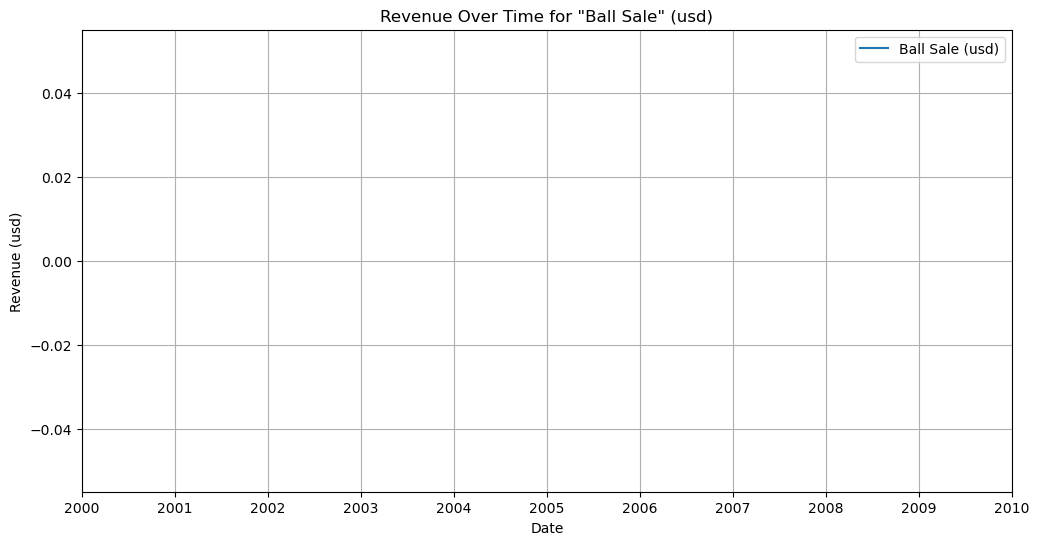

In [29]:
# Filter the data for a specific operation, e.g., "Ball Sale"
revenue_data_usd = df_fin_usd[df_fin_usd['Operation'] == 'Ball Sale']

# Plot the revenue data
plt.figure(figsize=(12, 6))
plt.plot(revenue_data_usd['Date'], revenue_data_usd['Sum'], label='Ball Sale (usd)')

plt.xlabel('Date')
plt.ylabel('Revenue (usd)')
plt.title('Revenue Over Time for "Ball Sale" (usd)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

####Revenue Over time for different Operation types

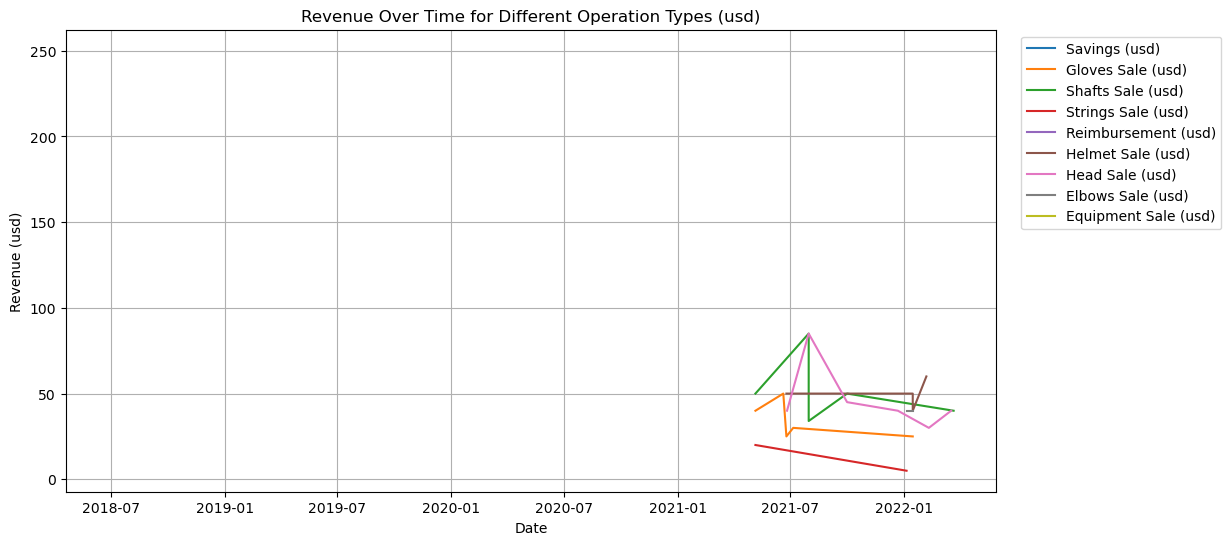

In [30]:
# Get the unique revenue operation types
revenue_operation_types = df_fin_usd[df_fin_usd['Sum'] > 0]['Operation'].unique()

# Plot line graphs for each revenue operation type
plt.figure(figsize=(12, 6))
for operation_type in revenue_operation_types:
    revenue_data_usd = df_fin_usd[df_fin_usd['Operation'] == operation_type]
    plt.plot(revenue_data_usd['Date'], revenue_data_usd['Sum'], label=f'{operation_type} (usd)')

plt.xlabel('Date')
plt.ylabel('Revenue (usd)')
plt.title('Revenue Over Time for Different Operation Types (usd)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


In [31]:
# Get the unique revenue operation types
revenue_operation_types = df_fin_usd[df_fin_usd['Sum'] > 0]['Operation'].unique()

# Create an interactive line graph for each revenue operation type
fig = px.line(df_fin_usd[df_fin_usd['Sum'] > 0], x='Date', y='Sum', color='Operation',
              labels={'Sum': 'Revenue (usd)'}, title='Revenue Over Time for Different Operation Types (usd)',
              category_orders={"Operation": revenue_operation_types})
fig.update_layout(
    legend_title_text='Operation Type',
    height=600,  # Change the height to your desired value
    width=1000  # Change the width to your desired value
)


# Show the interactive graph
fig.show()

#####Revenue over time Interactivce for different Operations

In [65]:
# Top Expense Operation Types in usd (excluding "Payout")
top_expense_usd = df_fin_usd[df_fin_usd['Sum'] < 0]
top_expense_usd = top_expense_usd[top_expense_usd['Operation'] != 'Payout']
top_expense_usd = top_expense_usd.groupby('Operation')['Sum'].sum().nsmallest(20).reset_index()

# Reverse the sorting order
top_expense_usd = top_expense_usd.iloc[::-1]

# Create a horizontal bar graph with the highest value at the top
fig_expense_usd = px.bar(top_expense_usd, x='Sum', y='Operation', title='Top Expense Operation Types (usd)')

# Show or save the figure
fig_expense_usd.show()

####Top5 Revenue "Operation Types"

In [64]:
# Top Revenue Operation Types in usd
top_revenue_usd = df_fin_usd[df_fin_usd['Sum'] > 0]
top_revenue_usd = top_revenue_usd.groupby('Operation')['Sum'].sum().nlargest(20).reset_index()

# Reverse the sorting order
top_revenue_usd = top_revenue_usd.iloc[::-1]

# Create a horizontal bar graph with the highest value at the top
fig_revenue_usd = px.bar(top_revenue_usd, x='Sum', y='Operation', title='Top Revenue Operation Types (usd)')

# Show or save the figure
fig_revenue_usd.show()

##Turnover Calculations

In [34]:
# Calculate the total turnover as the sum of absolute values of the "Sum" column
total_turnover_usd = df_fin_usd['Sum'].abs().sum()

# Display the total turnover
print("Total Turnover (USD):", total_turnover_usd)

Total Turnover (USD): 3090


##Revenue Calculations

In [35]:
# Calculate income and expenses for USD DataFrame
income_usd = df_fin_usd[df_fin_usd['Classification'].isin(['Credit', 'Credit USD'])]['Sum'].sum()
expenses_usd = df_fin_usd[df_fin_usd['Classification'].isin(['Debit', 'Debit USD'])]['Sum'].sum()

# Exclude "Payout Total USD"
expenses_usd -= payout_total_usd

# Display the results
print("Income USD:", income_usd)
print("Expenses USD:", expenses_usd)

Income USD: 1545
Expenses USD: -499


##Profit Calculations

In [36]:
total_profit_usd = abs(payout_total_usd)


print(total_profit_usd)

1046


In [37]:
# Calculate profit margin (Profit as a percentage of income)
profit_margin_usd = (abs(payout_total_usd) / income_usd) * 100


# Display the results for USD
print("Profit Margin (USD):", profit_margin_usd)

Profit Margin (USD): 67.70226537216828


##Revenue calculation for individual "Operations" USD

In [38]:
###test
# Filter the USD data frame for the "Ball Purchase" and "Ball Purchases" operations
ball_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Ball Sale'])]

# Calculate the sum of the "Ball Purchase" and "Ball Purchases" operations in USD
ball_revenue_usd = ball_revenue_usd['Sum'].sum()

print(ball_revenue_usd)

0


In [39]:
###test 
test = ball_total_usd / ball_revenue_usd

print(ball_total_usd)
print(ball_revenue_usd)
print(test)

-181
0
-inf


C:\Users\mader\AppData\Local\Temp\ipykernel_28932\1080902064.py:2: RuntimeWarning:

divide by zero encountered in longlong_scalars



In [40]:
# Filter the USD data frame for the specified operations for each category
ball_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Ball Sale'])]['Sum'].sum()
elbows_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Elbows Sale'])]['Sum'].sum()
equipment_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Equipment Sale'])]['Sum'].sum()
gloves_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Gloves Sale'])]['Sum'].sum()
head_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Head Sale'])]['Sum'].sum()
helmet_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Helmet Sale'])]['Sum'].sum()
shafts_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Shafts Sale'])]['Sum'].sum()
stick_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Stick Sale'])]['Sum'].sum()
strings_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Strings Sale'])]['Sum'].sum()
t_shirt_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['T-Shirt Sale'])]['Sum'].sum()
order_refund_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Order Refund'])]['Sum'].sum()
membership_fee_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Membership Fee'])]['Sum'].sum()
player_fine_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Player Fine'])]['Sum'].sum()
reimbursement_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Reimbursement'])]['Sum'].sum()
shoulders_sale_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Shoulders Sale'])]['Sum'].sum()
loan_revenue_usd = (df_fin_usd[df_fin_usd['Operation'].isin(['Loan Repayment'])]['Sum'].sum()) + (df_fin_usd[df_fin_usd['Operation'].isin(['Loan'])]['Sum'].sum())
bank_interest_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Credit'])]['Sum'].sum()
lacrosse_clinic_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Lacrosse Clinic'])]['Sum'].sum()
field_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Field Fees'])]['Sum'].sum()




In [41]:
# Display the revenue for each category in USD
print("Ball Revenue (USD): {:.2f}".format(ball_revenue_usd))
print("Elbows Revenue (USD): {:.2f}".format(elbows_revenue_usd))
print("Equipment Revenue (USD): {:.2f}".format(equipment_revenue_usd))
print("Gloves Revenue (USD): {:.2f}".format(gloves_revenue_usd))
print("Head Revenue (USD): {:.2f}".format(head_revenue_usd))
print("Helmet Revenue (USD): {:.2f}".format(helmet_revenue_usd))
print("Shafts Revenue (USD): {:.2f}".format(shafts_revenue_usd))
print("Stick Revenue (USD): {:.2f}".format(stick_revenue_usd))
print("Strings Revenue (USD): {:.2f}".format(strings_revenue_usd))
print("T-Shirt Revenue (USD): {:.2f}".format(t_shirt_revenue_usd))
print("Order Refund Revenue (USD): {:.2f}".format(order_refund_revenue_usd))
print("Membership Fee Revenue (USD): {:.2f}".format(membership_fee_revenue_usd))
print("Player Fine Revenue (USD): {:.2f}".format(player_fine_revenue_usd))
print("Reimbursement Revenue (USD): {:.2f}".format(reimbursement_revenue_usd))
print("Shoulders Sale Revenue (USD): {:.2f}".format(shoulders_sale_revenue_usd))
print("Loan Revenue (USD): {:.2f}".format(loan_revenue_usd))
print("Bank Interest Revenue (USD): {:.2f}".format(bank_interest_revenue_usd))
print("Lacrosse Clinic Revenue (USD): {:.2f}".format(lacrosse_clinic_revenue_usd))
print("Field Revenue (USD): {:.2f}".format(field_revenue_usd))


Ball Revenue (USD): 0.00
Elbows Revenue (USD): 80.00
Equipment Revenue (USD): 5.00
Gloves Revenue (USD): 195.00
Head Revenue (USD): 310.00
Helmet Revenue (USD): 240.00
Shafts Revenue (USD): 259.00
Stick Revenue (USD): 0.00
Strings Revenue (USD): 25.00
T-Shirt Revenue (USD): 0.00
Order Refund Revenue (USD): 0.00
Membership Fee Revenue (USD): 0.00
Player Fine Revenue (USD): 0.00
Reimbursement Revenue (USD): 181.00
Shoulders Sale Revenue (USD): 0.00
Loan Revenue (USD): 0.00
Bank Interest Revenue (USD): 0.00
Lacrosse Clinic Revenue (USD): 0.00
Field Revenue (USD): 0.00


##Profit Percentage Calculation (USD)

In [42]:
ball_profit_percent_usd = ball_total_usd / ball_revenue_usd
elbows_profit_percent_usd = elbows_total_usd / elbows_revenue_usd
equipment_profit_percent_usd = equipment_total_usd / equipment_revenue_usd
field_profit_percent_usd = field_total_usd / field_revenue_usd
gloves_profit_percent_usd = gloves_total_usd / gloves_revenue_usd
head_profit_percent_usd = head_total_usd / head_revenue_usd
helmet_profit_percent_usd = helmet_total_usd / helmet_revenue_usd
loan_profit_percent_usd = loan_total_usd / loan_revenue_usd
shafts_profit_percent_usd = shafts_total_usd / shafts_revenue_usd
stick_profit_percent_usd = stick_total_usd / stick_revenue_usd
strings_profit_percent_usd = strings_total_usd / strings_revenue_usd
t_shirt_profit_percent_usd = t_shirt_total_usd / t_shirt_revenue_usd
membership_profit_percent_usd = membership_total_usd / membership_fee_revenue_usd
order_refund_profit_percent_usd = order_refund_total_usd / order_refund_revenue_usd
player_fine_profit_percent_usd = player_fine_total_usd / player_fine_revenue_usd
reimbursement_profit_percent_usd = reimbursement_total_usd / reimbursement_revenue_usd
shoulders_sale_profit_percent_usd = shoulders_sale_total_usd / shoulders_sale_revenue_usd
bank_interest_profit_percent_usd = bank_interest_usd / bank_interest_revenue_usd
lacrosse_clinic_profit_percent_usd = lacrosse_clinic_usd / lacrosse_clinic_revenue_usd



C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2976571891.py:1: RuntimeWarning:

divide by zero encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2976571891.py:4: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2976571891.py:8: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2976571891.py:10: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2976571891.py:12: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2976571891.py:13: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2976571891.py:14: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2976571891.py:15: RuntimeWar

In [43]:
ball_profit_percent_usd
elbows_profit_percent_usd
equipment_profit_percent_usd
field_profit_percent_usd
gloves_profit_percent_usd
head_profit_percent_usd
helmet_profit_percent_usd
loan_profit_percent_usd
shafts_profit_percent_usd
stick_profit_percent_usd
strings_profit_percent_usd
t_shirt_profit_percent_usd
membership_profit_percent_usd
order_refund_profit_percent_usd
player_fine_profit_percent_usd
reimbursement_profit_percent_usd
shoulders_sale_profit_percent_usd
bank_interest_profit_percent_usd
lacrosse_clinic_profit_percent_usd

nan

###Print Profit Percentage (USD)

In [44]:
print("Ball Profit Percent (USD): {:.2f}%".format(ball_profit_percent_usd * 100))
print("Elbows Profit Percent (USD): {:.2f}%".format(elbows_profit_percent_usd * 100))
print("Equipment Profit Percent (USD): {:.2f}%".format(equipment_profit_percent_usd * 100))
print("Field Profit Percent (USD): {:.2f}%".format(field_profit_percent_usd * 100))
print("Gloves Profit Percent (USD): {:.2f}%".format(gloves_profit_percent_usd * 100))
print("Head Profit Percent (USD): {:.2f}%".format(head_profit_percent_usd * 100))
print("Helmet Profit Percent (USD): {:.2f}%".format(helmet_profit_percent_usd * 100))
print("Loan Profit Percent (USD): {:.2f}%".format(loan_profit_percent_usd * 100))
print("Shafts Profit Percent (USD): {:.2f}%".format(shafts_profit_percent_usd * 100))
print("Stick Profit Percent (USD): {:.2f}%".format(stick_profit_percent_usd * 100))
print("Strings Profit Percent (USD): {:.2f}%".format(strings_profit_percent_usd * 100))
print("T-Shirt Profit Percent (USD): {:.2f}%".format(t_shirt_profit_percent_usd * 100))
print("Membership Fee Profit Percent (USD): {:.2f}%".format(membership_profit_percent_usd * 100))
print("Order Refund Profit Percent (USD): {:.2f}%".format(order_refund_profit_percent_usd * 100))
print("Player Fine Profit Percent (USD): {:.2f}%".format(player_fine_profit_percent_usd * 100))
print("Reimbursement Profit Percent (USD): {:.2f}%".format(reimbursement_profit_percent_usd * 100))
print("Shoulders Sale Profit Percent (USD): {:.2f}%".format(shoulders_sale_profit_percent_usd * 100))
print("Bank Interest Profit Percent (USD): {:.2f}%".format(bank_interest_profit_percent_usd * 100))
print("Lacrosse Clinic Profit Percent (USD): {:.2f}%".format(lacrosse_clinic_profit_percent_usd * 100))


Ball Profit Percent (USD): -inf%
Elbows Profit Percent (USD): -212.50%
Equipment Profit Percent (USD): 100.00%
Field Profit Percent (USD): nan%
Gloves Profit Percent (USD): 100.00%
Head Profit Percent (USD): 100.00%
Helmet Profit Percent (USD): 100.00%
Loan Profit Percent (USD): nan%
Shafts Profit Percent (USD): 100.00%
Stick Profit Percent (USD): nan%
Strings Profit Percent (USD): -172.00%
T-Shirt Profit Percent (USD): nan%
Membership Fee Profit Percent (USD): nan%
Order Refund Profit Percent (USD): nan%
Player Fine Profit Percent (USD): nan%
Reimbursement Profit Percent (USD): 100.00%
Shoulders Sale Profit Percent (USD): nan%
Bank Interest Profit Percent (USD): nan%
Lacrosse Clinic Profit Percent (USD): nan%


####Top 15 Profit Percentages of "Operations"

In [45]:
# Create a dictionary with the profit percentages
profit_percentages_usd = {
    "Ball": ball_profit_percent_usd,
    "Elbows": elbows_profit_percent_usd,
    "Equipment": equipment_profit_percent_usd,
    "Field": field_profit_percent_usd,
    "Gloves": gloves_profit_percent_usd,
    "Head": head_profit_percent_usd,
    "Helmet": helmet_profit_percent_usd,
    "Loan": loan_profit_percent_usd,
    "Shafts": shafts_profit_percent_usd,
    "Stick": stick_profit_percent_usd,
    "Strings": strings_profit_percent_usd,
    "T-Shirt": t_shirt_profit_percent_usd,
    "Membership Fee": membership_profit_percent_usd,
    "Order Refund": order_refund_profit_percent_usd,
    "Player Fine": player_fine_profit_percent_usd,
    "Shoulders Sale": shoulders_sale_profit_percent_usd,
    "Bank Interest": bank_interest_profit_percent_usd,
    "Lacrosse Clinic": lacrosse_clinic_profit_percent_usd
}

# Sort the dictionary by profit percentages and take the top 15
top_15_profit_percentages_usd = dict(sorted(profit_percentages_usd.items(), key=lambda item: item[1], reverse=True)[:15])

# Create a DataFrame from the top 15 profit percentages
df_top_15_profit_usd = pd.DataFrame(list(top_15_profit_percentages_usd.items()), columns=["Operation", "Profit Percentage (usd)"])

# Create a bar graph
fig = px.bar(df_top_15_profit_usd, x="Operation", y="Profit Percentage (usd)", title="Top 15 Profit Percentages (usd)")
fig.show()


####Top 5 Most Profitable by volume USD Operations by profit percentage

In [46]:
# Calculate the profit percentages for each operation
profit_percentages = {
    "Stick": stick_profit_percent_usd,
    "Membership Fee": membership_profit_percent_usd,
    "Helmet": helmet_profit_percent_usd,
    "Field": field_profit_percent_usd,
    "Head": head_profit_percent_usd
}

# Sort the profit percentages dictionary by the profit percentage in descending order
sorted_profit_percentages = dict(sorted(profit_percentages.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame from the sorted profit percentages
df_sorted_profit_percentages = pd.DataFrame(list(sorted_profit_percentages.items()), columns=["Operation", "Profit Percentage (usd)"])

# Create a bar graph
fig = px.bar(df_sorted_profit_percentages, x="Operation", y="Profit Percentage (usd)",
             title="Top 5 Most Profitable by volume usd Operations by profit percentage")
fig.show()

#Other Visualizations

##Cumlative Fund Sum Over Time (USD)

In [47]:
# Calculate the cumulative sum of daily "Sum" (Profit/Loss)
df_fin_usd = df_fin_usd.assign(**{'Fund Cumulative': df_fin_usd['Sum'].cumsum()})




# Create a line graph to visualize the cumulative sum over time
fig_cumulative_sum_usd = px.line(df_fin_usd, x='Date', y='Fund Cumulative',
                                  title='Cumulative Sum Over Time (usd)')

# Show the interactive graph
fig_cumulative_sum_usd.show()


##Net Profit/Loss per Month (USD) (chronological)

In [48]:
#take out all payout operations
# Assuming you have a DataFrame 'df_fin'
# Filter out rows with "payout" in the 'Operation' column and replace the original DataFrame
df_fin_usd = df_fin_usd[df_fin_usd['Operation'] != 'Payout']


# Assuming you have a DataFrame 'df_fin_usd' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_usd['Date'] = pd.to_datetime(df_fin_usd['Date'])

# Extract month and year from the 'Date' column
df_fin_usd['Month'] = df_fin_usd['Date'].dt.to_period('M')

# Calculate the sum of profits and losses for each month
profits = df_fin_usd[df_fin_usd['Sum'] > 0].groupby('Month')['Sum'].sum()
losses = df_fin_usd[df_fin_usd['Sum'] < 0].groupby('Month')['Sum'].sum()

# Calculate the net profit or loss for each month
net_profit_loss = profits.add(losses, fill_value=0)

# Convert 'Month' to strings
net_profit_loss.index = net_profit_loss.index.astype(str)

# Create a bar graph
fig = px.bar(x=net_profit_loss.index, y=net_profit_loss.values, title='Net Profit/Loss by Month')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()

In [49]:
# Assuming you have a DataFrame 'df_fin_usd' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_usd['Date'] = pd.to_datetime(df_fin_usd['Date'])

# Extract the year from the 'Date' column
df_fin_usd['Year'] = df_fin_usd['Date'].dt.year

# Calculate the sum of profits and losses for each year
profits = df_fin_usd[df_fin_usd['Sum'] > 0].groupby('Year')['Sum'].sum()
losses = df_fin_usd[df_fin_usd['Sum'] < 0].groupby('Year')['Sum'].sum()

# Calculate the net profit or loss for each year
net_profit_loss = profits.add(losses, fill_value=0)

# Convert 'Year' to strings
net_profit_loss.index = net_profit_loss.index.astype(str)

# Create a bar graph
fig = px.bar(x=net_profit_loss.index, y=net_profit_loss.values, title='Net Profit/Loss by Year')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()

##Net Profit/Loss per Month grouped (USD) 

In [50]:
# Assuming you have a DataFrame 'df_fin_usd' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_usd['Date'] = pd.to_datetime(df_fin_usd['Date'])

# Extract the month from the 'Date' column
df_fin_usd['Month'] = df_fin_usd['Date'].dt.strftime('%B')

# Calculate the sum of profits and losses for each month
profits = df_fin_usd[df_fin_usd['Sum'] > 0].groupby('Month')['Sum'].sum().reset_index()
losses = df_fin_usd[df_fin_usd['Sum'] < 0].groupby('Month')['Sum'].sum().reset_index()

# Merge the profits and losses dataframes
merged = pd.merge(profits, losses, on='Month', how='outer', suffixes=('_Profit', '_Loss'))

# Fill missing values with 0
merged = merged.fillna(0)

# Calculate the net profit or loss for each month
merged['Net_Profit_Loss'] = merged['Sum_Profit'] + merged['Sum_Loss']

# Create a bar graph
fig = px.bar(merged, x='Month', y='Net_Profit_Loss',
             title='Net Profit/Loss by Month (Grouped)')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()


##Monthly Revenue/Expenses (USD)

In [51]:
# Assuming df_fin_usd and df_fin_usd are your dataframes
# We'll work with df_fin_usd for this example

# Convert the 'Date' column to datetime
df_fin_usd['Date'] = pd.to_datetime(df_fin_usd['Date'])

# Calculate revenue and expenses per month
revenue_per_month = df_fin_usd[df_fin_usd['Sum'] > 0].groupby(df_fin_usd['Date'].dt.strftime('%B %Y'))['Sum'].sum().reset_index()
expenses_per_month = df_fin_usd[df_fin_usd['Sum'] < 0].groupby(df_fin_usd['Date'].dt.strftime('%B %Y'))['Sum'].sum().reset_index()

# Create a bar graph for revenue per month
fig_revenue = px.bar(revenue_per_month, x='Date', y='Sum', labels={'Date': 'Month', 'Sum': 'Revenue (usd)'},
                    title='Monthly Revenue (usd)')

# Create a bar graph for expenses per month
fig_expenses = px.bar(expenses_per_month, x='Date', y='Sum', labels={'Date': 'Month', 'Sum': 'Expenses (usd)'},
                     title='Monthly Expenses (usd)')

# Show the graphs
fig_revenue.show()
fig_expenses.show()


##Revenue by Month (Grouped)

In [52]:
# Assuming you have a DataFrame 'df_fin_usd' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_usd['Date'] = pd.to_datetime(df_fin_usd['Date'])

# Extract the month from the 'Date' column
df_fin_usd['Month'] = df_fin_usd['Date'].dt.strftime('%B')

# Calculate the sum of profits and losses for each month
profits = df_fin_usd[df_fin_usd['Sum'] > 0].groupby('Month')['Sum'].sum().reset_index()
losses = df_fin_usd[df_fin_usd['Sum'] < 0].groupby('Month')['Sum'].sum().reset_index()

# Merge the profits and losses dataframes
merged = pd.merge(profits, losses, on='Month', how='outer', suffixes=('_Profit', '_Loss'))

# Fill missing values with 0
merged_profit = merged.fillna(0)

# Calculate the net profit or loss for each month
merged['Net_Profit_Loss'] = merged['Sum_Profit']

# Create a bar graph
fig = px.bar(merged, x='Month', y='Net_Profit_Loss',
             title='Revenue by Month (Grouped)')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()



##Expenses by Month (Grouped)

In [53]:
# Assuming you have a DataFrame 'df_fin_usd' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_usd['Date'] = pd.to_datetime(df_fin_usd['Date'])

# Extract the month from the 'Date' column
df_fin_usd['Month'] = df_fin_usd['Date'].dt.strftime('%B')

# Calculate the sum of profits and losses for each month
profits = df_fin_usd[df_fin_usd['Sum'] > 0].groupby('Month')['Sum'].sum().reset_index()
losses = df_fin_usd[df_fin_usd['Sum'] < 0].groupby('Month')['Sum'].sum().reset_index()

# Merge the profits and losses dataframes
merged = pd.merge(profits, losses, on='Month', how='outer', suffixes=('_Profit', '_Loss'))

# Fill missing values with 0
merged_loss = merged.fillna(0)

# Calculate the net profit or loss for each month
merged['Net_Profit_Loss'] = merged['Sum_Loss']

# Create a bar graph
fig = px.bar(merged, x='Month', y='Net_Profit_Loss',
             title='Expenses by Month (Grouped)')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()


##Net Profit/Loss by Month 

In [54]:
# Convert the 'Date' column to datetime
df_fin_usd['Date'] = pd.to_datetime(df_fin_usd['Date'])

# Calculate revenue per month
revenue_per_month = df_fin_usd[df_fin_usd['Sum'] > 0].groupby(df_fin_usd['Date'].dt.strftime('%B %Y'))['Sum'].sum().reset_index()


# Create a bar graph for the revenue per month in chronological order
fig_net_profit = px.bar(revenue_per_month, x='Date', y='Sum',
                        labels={'Date': 'Month', 'Sum': 'Net Profit/Loss (usd)'},
                        title='Net Profit/Loss by Month (Chronological Order)')

# Show the graph
fig_net_profit.show()



##Field Rental "Operations" by Year

In [55]:
# Assuming you have a DataFrame 'df_fin' with a 'Date' column
# Convert the 'Date' column to datetime
df_fin['Date'] = pd.to_datetime(df_fin['Date'])

# Filter the DataFrame for 'Field Rental' operations
field_rental_df = df_fin[df_fin['Operation'] == 'Field Rental']

# Group by year and count the occurrences
field_rental_df['Year'] = field_rental_df['Date'].dt.year
count_by_year = field_rental_df.groupby('Year').size().reset_index(name='Count')

# Create a line graph
fig = px.line(count_by_year, x='Year', y='Count', title='Field Rental Operations by Year')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Count')

# Show the graph
fig.show()

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\3612053112.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Field Rental "Operations" By Month (Cumulative)

In [56]:
# Filter the DataFrame for 'Field Rental' operations
field_rental_df = df_fin[df_fin['Operation'] == 'Field Rental']

# Extract the month from the 'Date' column
field_rental_df['Month'] = field_rental_df['Date'].dt.strftime('%B')

# Define a custom sorting order for months
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Group by month and count the occurrences
count_by_month = field_rental_df.groupby('Month').size().reset_index(name='Count')

# Sort the months in chronological order
count_by_month['Month'] = pd.Categorical(count_by_month['Month'], categories=month_order, ordered=True)
count_by_month = count_by_month.sort_values('Month')

# Create a line graph
fig = px.line(count_by_month, x='Month', y='Count', title='Field Rental Operations by Month')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Count')

# Show the graph
fig.show()


C:\Users\mader\AppData\Local\Temp\ipykernel_28932\1136075507.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Equipment "Operations" over time

In [57]:
# Filter the DataFrame for 'Equipment' operations in the 'Category' column
equipment_df = df_fin[df_fin['Category'].str.contains('Equipment', case=False, na=False)]

# Extract the year from the 'Date' column
equipment_df['Year'] = equipment_df['Date'].dt.year

# Group by year and count the occurrences
count_by_year = equipment_df.groupby('Year').size().reset_index(name='Count')

# Create a line graph
fig = px.line(count_by_year, x='Year', y='Count', title='Equipment Operations Over Time')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Count')

# Show the graph
fig.show()

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\308070987.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Equipment "Operations" over time by Month

In [58]:
# Filter the DataFrame for 'Equipment' operations in the 'Category' column
equipment_df = df_fin[df_fin['Category'].str.contains('Equipment', case=False, na=False)]

# Extract the year and month from the 'Date' column
equipment_df['Year'] = equipment_df['Date'].dt.year
equipment_df['Month'] = equipment_df['Date'].dt.strftime('%B %Y')

# Count the occurrences for each month
count_by_month = equipment_df['Month'].value_counts().reset_index()
count_by_month.columns = ['Month', 'Count']

# Sort the months chronologically
count_by_month['Month'] = pd.to_datetime(count_by_month['Month'], format='%B %Y')
count_by_month = count_by_month.sort_values('Month')

# Create a line graph
fig = px.line(count_by_month, x='Month', y='Count', title='Equipment Operations Over Time (by Month)')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Count')

# Show the graph
fig.show()


C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2867454550.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mader\AppData\Local\Temp\ipykernel_28932\2867454550.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Equipment "Operations" Count by Month (Cumulative)

In [59]:
# Extract the month and year from the 'Date' column
df_fin['Month'] = df_fin['Date'].dt.strftime('%B')

# Filter the DataFrame for "Equipment" operations
equipment_operations = df_fin[df_fin['Category'] == 'Equipment']

# Group the equipment operations by the month and calculate the count
equipment_grouped = equipment_operations.groupby('Month').size().reset_index(name='Count')

# Create a bar graph to show the count of "Equipment" operations by month
fig = px.bar(equipment_grouped, x='Month', y='Count',
             title='Equipment Operations Count by Month')
fig.update_xaxes(categoryorder='array', categoryarray=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Show the graph
fig.show()